In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
X = np.random.rand(160,1)
y = 2.5 + 5 * X+np.random.randn(160,1) 

Text(0, 0.5, '$y$')

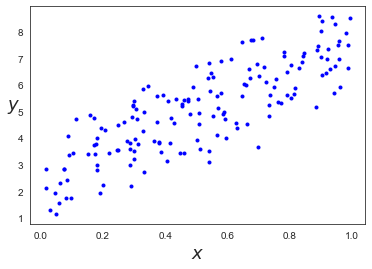

In [33]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [34]:
def  cost(param,X,y):
    m = len(y)
    
    predictions = X.dot(param)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [35]:
def gradient_descent(X,y,param,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    param_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,param)
        
        param = param -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        param_history[it,:] =param.T
        cost_history[it]  = cost(param,X,y)
        
    return param, cost_history, param_history

In [36]:
lr =0.001
n_iter = 100000

param = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
param,cost_history,param_history = gradient_descent(X_b,y,param,lr,n_iter)


print('a:          {:0.3f},\nb:          {:0.3f}'.format(param[0][0],param[1][0]))

a:          2.495,
b:          5.049


In [37]:
X_new_b = np.c_[np.ones((len(X),1)),X]
y_predict = X_new_b.dot(param)

array([[5.03961874],
       [5.35518481],
       [5.89459819],
       [3.29539254],
       [4.38157769],
       [2.73514922],
       [2.74864938],
       [6.99406583],
       [6.55412951],
       [5.0102969 ],
       [7.33357901],
       [6.48636609],
       [6.04047153],
       [5.24578943],
       [6.60968954],
       [4.59686903],
       [6.02586378],
       [6.43294601],
       [6.15581412],
       [4.96644955],
       [5.34919795],
       [4.61221138],
       [2.58320455],
       [6.72300422],
       [3.40809253],
       [7.25944364],
       [5.03173461],
       [6.00495191],
       [6.43502583],
       [6.31529027],
       [7.26337529],
       [6.39557405],
       [2.88332432],
       [2.80090098],
       [2.87526809],
       [3.4069334 ],
       [4.75646605],
       [6.20308822],
       [4.38894586],
       [6.97597435],
       [5.06056078],
       [6.55846178],
       [5.90185972],
       [5.93451516],
       [7.50907594],
       [4.01473654],
       [5.21752427],
       [7.051

In [8]:
X_b = np.c_[np.ones((160,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[2.09974823]
 [5.57728529]]


In [9]:
X_new_b = np.c_[np.ones((len(X),1)),X]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[6.56349855],
       [2.988868  ],
       [7.40263063],
       [7.2952037 ],
       [6.29853681],
       [5.82565841],
       [3.58864162],
       [6.85125337],
       [7.15033104],
       [5.98266284],
       [3.02628318],
       [2.20507791],
       [3.97270896],
       [3.15235863],
       [4.52210966],
       [4.81770865],
       [5.00761392],
       [6.31684885],
       [6.17562746],
       [2.12285307],
       [2.3123752 ],
       [4.9499551 ],
       [2.89356169],
       [5.06510907],
       [5.56019273],
       [6.1318693 ],
       [6.12651645],
       [3.97860362],
       [4.1725961 ],
       [6.28757317],
       [4.82231667],
       [4.0131912 ],
       [3.71964699],
       [5.0472785 ],
       [6.82460493],
       [2.58641615],
       [6.72353502],
       [3.18087778],
       [5.45011616],
       [5.93121799],
       [3.8957469 ],
       [2.83887125],
       [7.45812742],
       [5.43636304],
       [7.63936595],
       [5.4443464 ],
       [6.23950074],
       [5.333

Text(0, 0.5, '$y$')

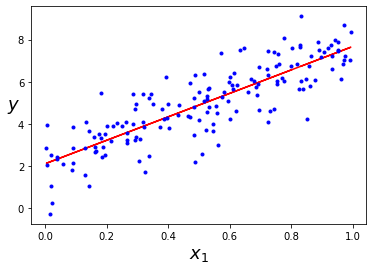

In [10]:
plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [13]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [14]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [24]:
num_points = 160

mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

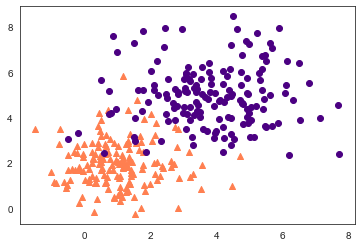

In [25]:
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='coral')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='indigo')

In [26]:
x = np.concatenate([x_1, x_2])
labels = np.array([0] * num_points + [1] *  num_points)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-3.77204328]
 [ 0.68874907]
 [ 0.73433805]] 



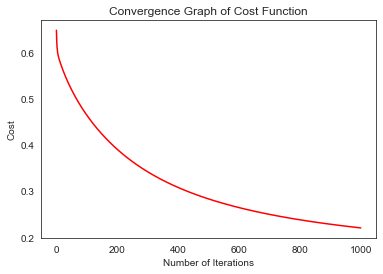

In [27]:
labels = labels[:,np.newaxis]

m = len(labels)

X = np.hstack((np.ones((m,1)),x))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1000
learning_rate = 0.05

initial_cost = compute_cost(X, labels, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, labels, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [28]:
y_pred = predict(X, params_optimal)

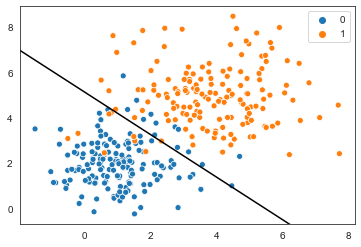

In [29]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=labels.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

In [30]:
k = 0
for i in range(len(labels)):
    if (labels[i] == y_pred[i]):
        k = k+1

accuracy = k/len(labels)
print(accuracy)


0.93125
